# Explore the data augmentation library

When augmenting an image dataset for a computer vision task, it is important to think about the use case and apply the augmentations which can result in plausible new data. For example, if you were training a model for a fixed street camera, it is unlikely the model will ever see humans and animals walking by upside down. Therefore, applying an augmentation which vertically flips the image might not be relevant. Flipping an image vertically could be relevant, however, for a camera aimed top down on a production line with products. 

This notebook provides an easy interface where you can test the image augmentation library on a sample image. Feel free to adjust the settings on the examples in this notebook to understand how the image augmentations work. This will help you determine which augmentations and settings might be relevant for your use case.

First, run the cell below to import the necessary libraries.

In [2]:
import numpy as np
from PIL import Image

from util.image_augmentator import augment_image
from util.image_augmentator import visualize_image

You will use the same sample image throughout this notebook to test the augmentation functions. Run the cell below to view the sample image with its annotations.

The sample image is extracted from the [Computer vision in retail workshop dataset](https://github.com/aws-samples/computer-vision-retail-workshop/tree/main/dataset), licensed under the Creative Commons Attribution-ShareAlike 4.0 International License.

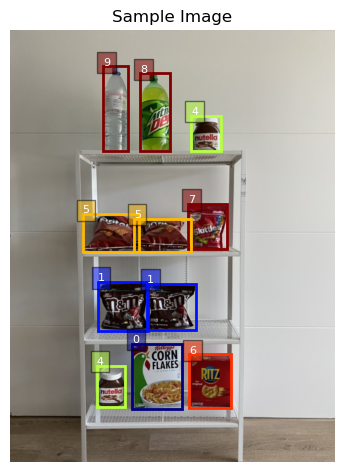

In [3]:
SAMPLE_IMAGE = "images/sample.jpg"
SAMPLE_ANNOTATIONS = [
    {"class_id": 4, "top": 169, "left": 357, "height": 70, "width": 59}, 
    {"class_id": 4, "top": 662, "left": 171, "height": 82, "width": 55}, 
    {"class_id": 8, "top": 85, "left": 256, "height": 153, "width": 60}, 
    {"class_id": 9, "top": 71, "left": 183, "height": 167, "width": 49}, 
    {"class_id": 7, "top": 343, "left": 351, "height": 89, "width": 77}, 
    {"class_id": 5, "top": 372, "left": 244, "height": 65, "width": 113}, 
    {"class_id": 5, "top": 363, "left": 143, "height": 74, "width": 112}, 
    {"class_id": 1, "top": 500, "left": 270, "height": 91, "width": 96}, 
    {"class_id": 1, "top": 497, "left": 173, "height": 96, "width": 99}, 
    {"class_id": 0, "top": 619, "left": 241, "height": 128, "width": 99}, 
    {"class_id": 6, "top": 640, "left": 353, "height": 106, "width": 82}
]

image = Image.open(SAMPLE_IMAGE)
visualize_image(np.asarray(image), "Sample Image", SAMPLE_ANNOTATIONS)

## Overview

Creating an augmented versions of an image is as easy as calling one method, called `augment_image()`. This method has many options and parameters to give you fine-grained control over the augmentations generated by the method. Run the cell below to see an example of 6 augmented images generated using various effects.


Augmenting sample.jpg [x6]


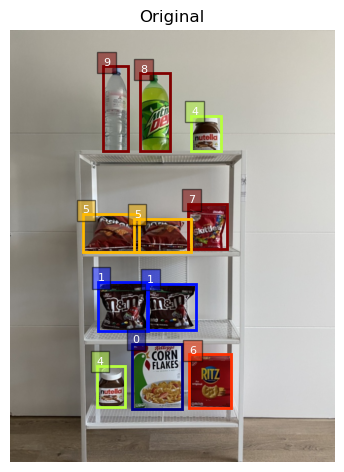


Transformation for augmentation 1
Scale: 0.9969660767672961
Translation_x: -6
Translation_y: 39
Rotation: 2.781567509498504
Sheer: -3.817255741310668
Noise: 0.000264555612104627
Brightness: 1.228467005905695
colorfulness: 1.3952623918545297
Color Temperature: -0.026857473613724203
Enhance: False
Flip left->right:  False
Flip up->down:  False


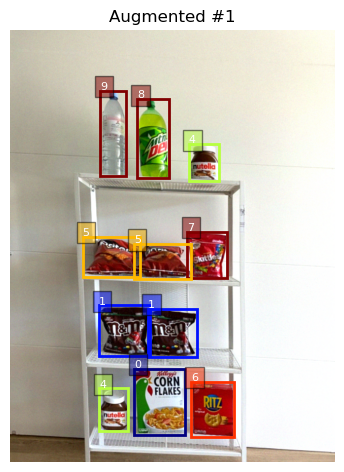


Transformation for augmentation 2
Scale: 1.0718352148675887
Translation_x: 46
Translation_y: -11
Rotation: 3.700121482468191
Sheer: 1.3992102132752382
Noise: 0.0007742336894342167
Brightness: 1.2318537978123298
colorfulness: 0.12045094325853967
Color Temperature: 0.04556615641393391
Enhance: False
Flip left->right:  True
Flip up->down:  False


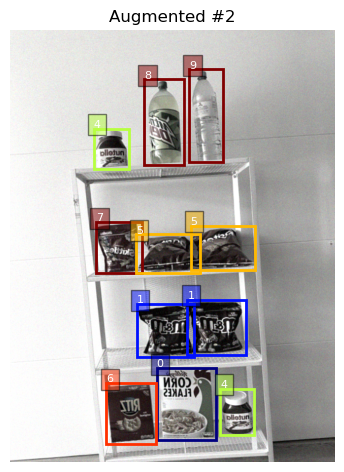


Transformation for augmentation 3
Scale: 1.0212435192322398
Translation_x: 29
Translation_y: 2
Rotation: 4.786183422327641
Sheer: -3.566467125909536
Noise: 0.00045615033221654854
Brightness: 1.460623654960237
colorfulness: 1.3335334308913354
Color Temperature: 0.35529515562681946
Enhance: False
Flip left->right:  True
Flip up->down:  False


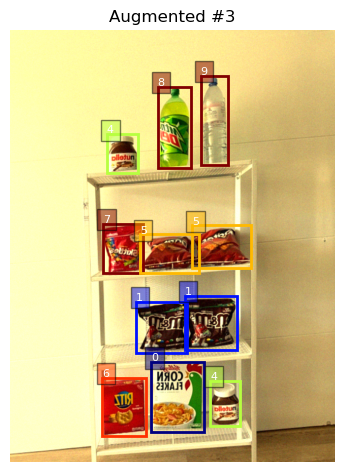


Transformation for augmentation 4
Scale: 0.9951974323486036
Translation_x: 6
Translation_y: 42
Rotation: 2.9915856421672364
Sheer: 4.44668917049584
Noise: 0.0005684339488686485
Brightness: 1.2772742093724383
colorfulness: 1.3412757392363188
Color Temperature: 0.15790227019348047
Enhance: False
Flip left->right:  False
Flip up->down:  False


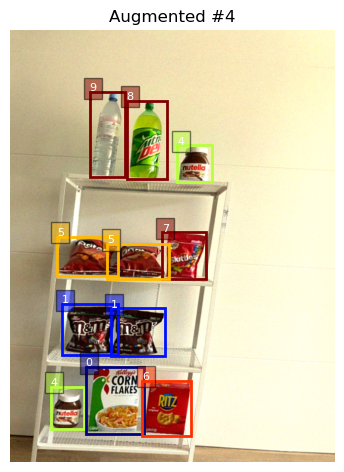


Transformation for augmentation 5
Scale: 0.9406446597025071
Translation_x: -42
Translation_y: -41
Rotation: -0.3852063774706812
Sheer: 0.2184832175007165
Noise: 1.8789800436355143e-05
Brightness: 1.0516555304016502
colorfulness: 0.4207651221476818
Color Temperature: 0.9825607570888393
Enhance: False
Flip left->right:  True
Flip up->down:  False


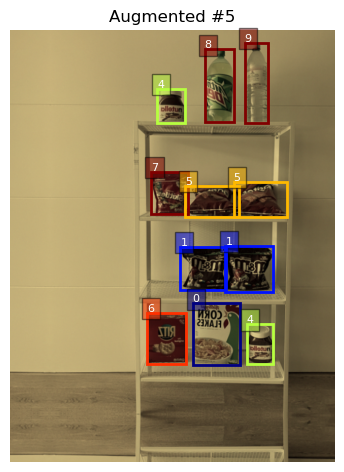


Transformation for augmentation 6
Scale: 1.0406523508799952
Translation_x: -47
Translation_y: 33
Rotation: 2.805291762864555
Sheer: -0.8533806000947639
Noise: 0.000617635497075877
Brightness: 1.105922367659539
colorfulness: 0.2578525953097066
Color Temperature: -0.3469327838779579
Enhance: False
Flip left->right:  True
Flip up->down:  False


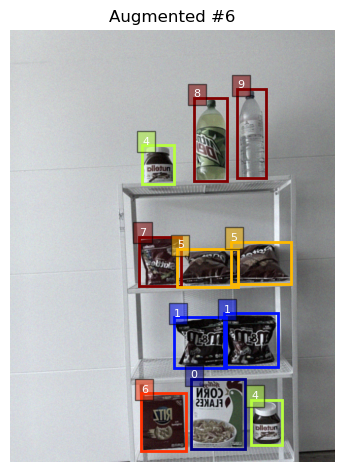

In [9]:
image_augm = augment_image(
    image_filename= SAMPLE_IMAGE,      # the image that will be used as source to generate augmentations
    bboxes = SAMPLE_ANNOTATIONS,       # a list of bounding boxes in the source image
    max_number_of_classes = None,      # the maximum number of object classes, needed if you want fixed bounding box colors
    how_many=6,                        # how many image variations to generate from the source image
    random_seed=0,                     # controls randomness for reproducibility
    range_scale=(0.75, 1.2),           # (mutliplier) minimum and maximum range for zooming/unzooming on the image
    range_translation=(-50, 50),       # (in pixels) minimum and maximum range for offseting the position of the image 
    range_rotation=(-5, 5),            # (in degrees) minimum and maximum range for rotating image left/right.
    range_sheer=(-5, 5),               # (in degrees) minimum and maximum range for skewing image left/right.
    range_noise=(0, 0.001),            # (variance) minimum and maximum range for noise variance
    range_brightness=(0.8, 1.5),       # (mutliplier) minimum and maximum range for brightness gain
    range_colorfulness=(0.0, 2),       # minimum and maximum range for color saturation
    range_color_temperature=(-0.5, 1), # minimum and maximum range for color temperature (warm/cool)
    flip_lr='random',                  # If None, no left-right flipping is applied. If 'all', all images are flipped. If 'random', images are flipped randomly
    flip_ud=None,                      # same as flip_lr, but for up-down.
    enhance=None,
    bbox_truncate = True,              # truncate bboxes that may end up outside the augmented image.
    bbox_discard_thr = 0.85,           # percentage of bounding box surface to be located inside the image, in order not to be discarded. 
    display=True,                      # display augmentations (set as False if you are generating lots of images!!!)
    verbose=True                       # display warning
)

The table below summarizes all the options provided by the `augment_image()` method. It also shows the value types required for each parameter, the possible range of values accepted for each parameter, and how to deactivate an option. Note that all augmentations are deactivated by default.

| Parameter | Description | Type | Range | Example values and behavior | How to deactivate | 
| --- | --- | --- | --- | --- | --- |
| `how_many` | How many image variations to generate from a single source image | Number | int [0,inf) | e.g. 10 | 0 |
| `random_seed` | A number that controls randomness (for reproducibility) | None or Number| int (-inf, inf) | e.g. 0 | None |
| `range_scale` | Minimum and maximum range for zooming/unzooming on the image | None or Tuple (min,max) | float (0,inf) | <1=zoom in, >1=zoom out, e.g. (0.5,1.5) | None |
| `range_translation` | Minimum and maximum range for offsetting the (x,y) position of the image (in pixels) | None or Tuple (min,max) | int (-inf,inf) | e.g. (-100, 100) | None |
| `range_rotation` | Minimum and maximum range for rotating image left/right (in degrees) | None or Tuple (min,max) | float [-360,360] | e.g.(-45, 45) | None |
| `range_sheer` | Minimum and maximum range for skewing image left/right (in degrees) | None or Tuple (min,max) | float [-360,360] | e.g.(-45, 45) | None |
| `range_noise` | Minimum and maximum range of noise variance | None or Tuple (min,max) | float [0, inf) | e.g. (0, 0.001) | None |
| `range_brightness` | Minimum and maximum range for brightness gain | None or Tuple (min,max) | float (0, inf) | 1=no change, <1=darken, >1=brighten, e.g. (0.5, 1.5) | None |
| `range_colorfulness` | Minimum and maximum range for color saturation | None or Tuple (min,max) | float[0,inf) | 1=no change, 0=grayscale, >1=more saturated | None
| `range_color_temperature` | Minimum and maximum range for color temperature (cool/warm) | None or Tuple (min,max) | float[-1,1] | -1=cool, 0=no change, 1=warm | None
| `flip_lr` | Flipping image left-right | None or String | None / 'random' / 'all' | If 'all', all images are doubled (flipped + original). If 'random', images are flipped randomly. | None |
| `flip_ud` | Flipping image up-down| None or String | None / 'random' / 'all' | If 'all', all images are doubled (flipped + original). If 'random', images are flipped randomly. | None |
| `bbox_truncate` | Truncate bounding boxes that may end up outside the augmented image| Boolean | False/True | e.g. True | False |
| `bbox_discard_thr` | Percentage of bounding box surface to be located inside the image, in order not to be discarded | Number | float [0,1] | e.g. 0.85 | N/A |
| `display` | Display augmentations or not in the notebook | Boolean | False/True | Use True only for testing! | False |
| `verbose` | Print warnings or not in the notebook | Boolean | False/True | Use True only for testing! | False |

## Augmentation examples

This section demonstrates each augmentation option individually and allows you to play with the parameters to see what happens.

### Scale

The scale augmentation zooms in or out on an image. The scale value is a multiplier, e.g. a value of 2 will zoom out of the image by 2x. Choosing a value between 0 and 1 will create the effect of zooming in, whereas choosing a value above 1 will create the effect of zooming out. 

The code below generates three augmented images with different zoom settings chosen from a range of 0.2 to 1.5. It displays the augmented images along with the original. Feel free to try different values to see what happens.


Augmenting sample.jpg [x3]


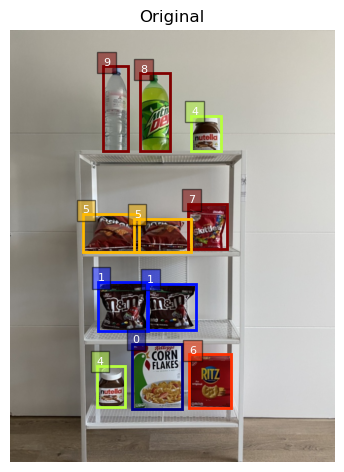


Transformation for augmentation 1
Scale: 0.3974043075610245
Translation_x: 0
Translation_y: 0
Rotation: 0.0
Sheer: 0.0
Noise: 0.0
Brightness: 1.0
colorfulness: 1.0
Color Temperature: 0.0
Enhance: False
Flip left->right:  False
Flip up->down:  False


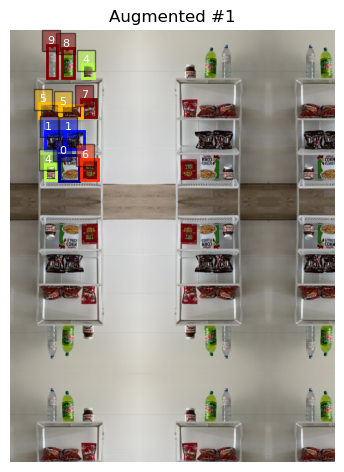


Transformation for augmentation 2
Scale: 0.20941926360164875
Translation_x: 0
Translation_y: 0
Rotation: 0.0
Sheer: 0.0
Noise: 0.0
Brightness: 1.0
colorfulness: 1.0
Color Temperature: 0.0
Enhance: False
Flip left->right:  False
Flip up->down:  False


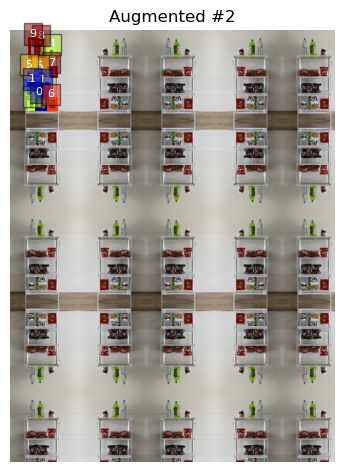


Transformation for augmentation 3
Scale: 0.9166120780640148
Translation_x: 0
Translation_y: 0
Rotation: 0.0
Sheer: 0.0
Noise: 0.0
Brightness: 1.0
colorfulness: 1.0
Color Temperature: 0.0
Enhance: False
Flip left->right:  False
Flip up->down:  False


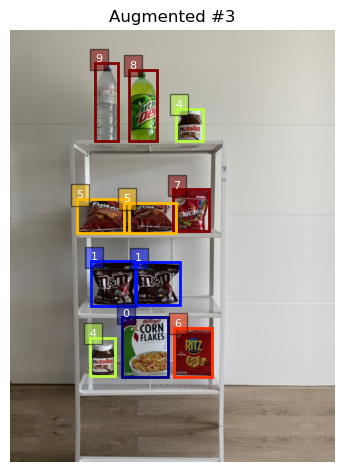

In [10]:
scaled_imgs = augment_image(
    image_filename=SAMPLE_IMAGE,
    bboxes =SAMPLE_ANNOTATIONS,
    how_many=3,
    range_scale=(0.2, 1.5),
    display=True
)

### Translation

The translation augmentation moves an image along the x and y-axis. The translation value represents the number of pixels, e.g. a translation value of 50 will move the image 50 pixels to the right on the x-axis. Choosing a negative value (i.e. less than 0) will create the effect of moving the image left (x-axis) or up (y-axis). Choosing a positive value (i.e. more than 0) will create the effect of moving the image right (x-axis) or down (y-axis).

The code below generates three augmented images with different translation settings chosen from a range of -100 to 100. It displays the augmented images along with the original. Feel free to try different values to see what happens.

In [ ]:
translated_imgs = augment_image(
    image_filename=SAMPLE_IMAGE,
    bboxes =SAMPLE_ANNOTATIONS,
    how_many=3,
    range_translation=(-100, 100),
    display=True
)

### Rotation

The rotation augmentation rotates an image around its center point. The rotation value represents degrees, e.g. a rotation value of 45 will rotate the image 45 degrees clockwise. Choosing a value between 0 and -360 will rotate the image anticlockwise. Choosing a value between 0 and 360 will rotate the image clockwise. 

The code below generates three augmented images with different rotation settings chosen from a range of -120 to 120. It displays the augmented images along with the original. Feel free to try different values to see what happens.

In [ ]:
rotated_imgs = augment_image(
    image_filename=SAMPLE_IMAGE,
    bboxes =SAMPLE_ANNOTATIONS,
    how_many=3,
    range_rotation=(-120, 120),
    display=True
)

### Sheer

Th sheer augmentation skews an image horizontally. The sheer value represents degrees, e.g. a sheer value of 10 will skew the image 10 degrees to the right. Choosing a value between 0 and -360 will skew the image to the left. Choosing a value between 0 and 360 will skew the image to the right. 

The code below generates three augmented images with different sheer settings chosen from a range of -20 to 20. It displays the augmented images along with the original. Feel free to try different values to see what happens. 

In [ ]:
sheer_imgs = augment_image(
    image_filename=SAMPLE_IMAGE,
    bboxes =SAMPLE_ANNOTATIONS,
    how_many=3,
    range_sheer=(-20, 20),
    display=True
)

### Noise

The noise augmentation adds random variations in brightness and color to pixels in images. Choosing a value above 0 will add noise to the image.

The code below generates three augmented images with different noise settings chosen from a range of 0.5 to 2. It displays the augmented images along with the original. Feel free to try different values to see what happens. 

In [ ]:
noise_imgs = augment_image(
    image_filename=SAMPLE_IMAGE,
    bboxes =SAMPLE_ANNOTATIONS,
    how_many=3,
    range_noise=(0.5, 2),
    display=True
)

### Brightness

The brightness augmentation lightens or darkens an image. A value of 1 will result in no change to the image. Choosing a value less than 1 will darken the image. Choosing a value larger than 1 will brighten the image. 

The code below generates three augmented images with different brightness settings chosen from a range of 0.5 to 1.5. It displays the augmented images along with the original. Feel free to try different values to see what happens. 

In [ ]:
brightness_imgs = augment_image(
    image_filename=SAMPLE_IMAGE,
    bboxes =SAMPLE_ANNOTATIONS,
    how_many=3,
    range_brightness=(0.5, 1.5),
    display=True
)

### Colorfulness

The colorfulness augmentation changes the color saturation of an image. Choosing a value between 0 and 1 will desaturate the image. Choosing a value of 1 will result in no change to the image. Choosing a value larger than 1 will saturate the image. 

The code below generates three augmented images with different color saturation settings chosen from a range of 0 to 2. It displays the augmented images along with the original. Feel free to try different values to see what happens.

In [ ]:
colorfulness_imgs = augment_image(
    image_filename=SAMPLE_IMAGE,
    bboxes =SAMPLE_ANNOTATIONS,
    how_many=3,
    range_colorfulness=(0, 2),
    display=True
)

### Color Temperature

The color temperature augmentation changes the warm and cool color tones of an image. Choosing a value between -1 and 0 will change the image to have cooler colors. Choosing a value between 0 and 1 will change the image to have warmer colors.

The code below generates three augmented images with different color temperature settings chosen from a range of -1 to 1. It displays the augmented images along with the original. Feel free to try different values to see what happens.

In [ ]:
color_temp_imgs = augment_image(
    image_filename=SAMPLE_IMAGE,
    bboxes =SAMPLE_ANNOTATIONS,
    how_many=3,
    range_color_temperature=(-1, 1),
    display=True
)

### Flip LR

The flip-lr augmentation flips an image horizontally. Choosing a value of 'all' will include both the original and flipped images in your augmented dataset. Choosing a value of 'random' will include either the original image or the flipped image in your augmented dataset (50/50 chance).

The code below generates two augmented images, one flipped and one not flipped. It displays the augmented images along with the original. Feel free to try different values to see what happens. 

In [ ]:
flip_lr_imgs = augment_image(
    image_filename=SAMPLE_IMAGE,
    bboxes =SAMPLE_ANNOTATIONS,
    how_many=1,
    flip_lr='all',
    display=True
)

### Flip UD

The flip-ud augmentation flips an image vertically. Choosing a value of 'all' will include both the original and flipped images in your augmented dataset. Choosing a value of 'random' will include either the original image or the flipped image in your augmented dataset (50/50 chance).

The code below generates two augmented images, one flopped and one not flipped. It displays the augmented images along with the original. Feel free to try different values to see what happens.

In [ ]:
flip_ud_imgs = augment_image(
    image_filename=SAMPLE_IMAGE,
    bboxes =SAMPLE_ANNOTATIONS,
    how_many=1,
    flip_ud='all',
    display=True
)

## Conclusion

Now that you have tested the different augmentation options in this notebook, you should have a better idea of the settings you want to apply to your own dataset. If you want to learn how to apply this image augmentation library to a full dataset and train a model on the resulting augmented dataset, take a look at the [TODO - Add notebook name and link here]() example.